# Régression linéaire 
## Mini brief projet 
### 1. Chargement de données 

In [46]:
from sklearn.datasets import load_boston
dataset = load_boston()
#description du dataset 
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Préparation des données
#### Transformation de dataframe

In [47]:
import numpy as np 
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# créer une colonne prix 
df['PRICE'] = dataset.target
# vérifier le nombre de valeurs nulles 
# code ici 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [70]:
X = df.drop('PRICE', axis = 1)
y = df.PRICE
X_train = df[["LSTAT","RM","TAX"]]
X_test = df[["LSTAT","RM","TAX"]]

#### base d'apprentissage et de test 

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Exploration de données
Pour choisir les variables d'entrée (features) on procède à une étude de corrélation 

<AxesSubplot:>

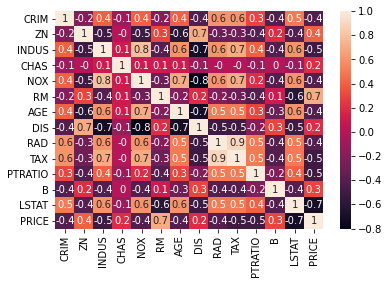

In [72]:
import seaborn as sns
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr,annot=True)

In [66]:
X_train = df[["LSTAT","RM,"TAX"]]
X_test = df[["LSTAT","RM,"TAX"]]

### Modèle de régression linéaire

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
reg = LinearRegression().fit(X
                             , y)
# train model 
reg.score(X, y)

0.7406426641094095

### Evaluation du modèle 

In [74]:
# train evaluate 

from sklearn.metrics import r2_score
y_train_predict = reg.predict(X_train)
# calcul de l'erreur rmse
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print(rmse)

#calcul de R²
r2 = r2_score(y_train, y_train_predict)
print(r2)

4.4260947896853855
0.7699147390335501


In [75]:
# test evaluate 

y_test_predict = reg.predict(X_test)

# calcul de l'erreur 
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print(rmse)

#calcul de R²
r2 = r2_score(y_test, y_test_predict)
print(r2)

5.569786564972763
0.6190210356879274


# Conclusion 
...